In [3]:
import numpy as np
import pandas as pd
import pickle
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv('./data/resume_dataset.csv')

In [5]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


## BASIC EDA

In [6]:
df_pr = df.copy()

In [7]:
resume_details = df_pr['Resume'][0].split('\n\n')

In [8]:
for detail in resume_details:
    print(detail,end='\n\n\n\n')

Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprience - 24 months
Python- Exprience - 24 monthsCompany Details 
company - Ernst & Young LLP
description - Fraud Investigations and Dispute Services   Assur

In [9]:
df_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [10]:
print(f"Total no of categories: {len(df['Category'].value_counts().tolist())}")

Total no of categories: 25


In [14]:
df_pr['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

<Axes: xlabel='Category'>

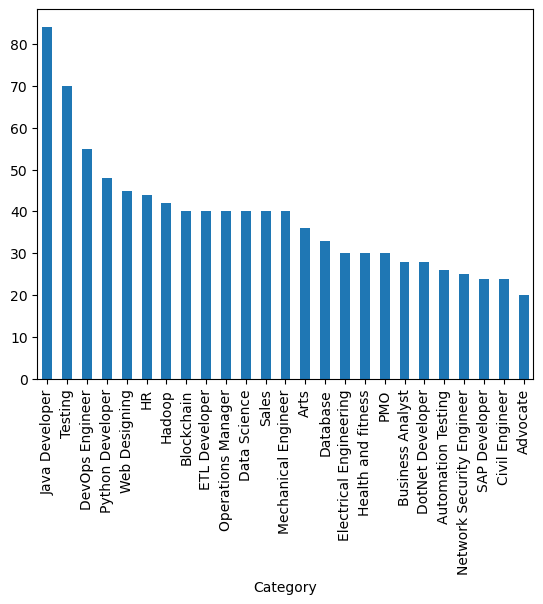

In [13]:
df_pr['Category'].value_counts().plot(kind='bar')

In [12]:
df_pr.isnull().sum()

Category    0
Resume      0
dtype: int64

In [12]:
df.shape

(962, 2)

## cleaning

In [15]:
def preprocessing(text):
    text = text.lower()
    words = word_tokenize(text,language='english')
    words = [lemmatizer.lemmatize(word,pos='v') for word in words if word not in stopwords.words('english')]
    words = [i.replace(',','') for i in words]
    words = [i.replace('.','') for i in words]
    words = [i.replace('*','') for i in words]
    words = [i.replace('-','') for i in words]
    words = [i.replace(':','') for i in words]
    return ' '.join(words)

In [16]:
df_pr['resume_preprocessed'] = df_pr['Resume'].apply(lambda x:preprocessing(x))

In [17]:
df_pr.drop('Resume',axis=1,inplace=True)

In [18]:
df_pr.rename(columns = {"Category":"category","resume_preprocessed":"resume"},inplace=True)

In [19]:
df_pr['category'] = label_encoder.fit_transform(df_pr['category'])

In [20]:
resume_v = vectorizer.fit_transform(df_pr['resume'])

In [21]:
resume_df = pd.DataFrame(resume_v.toarray(),columns=vectorizer.get_feature_names_out())

## saving or retrieving the file

In [22]:
with open('pre_df.pkl','wb') as fileobj:
    pickle.dump(df_pr,fileobj)
with open('resume_df.pkl','wb') as fileobj:
    pickle.dump(resume_df,fileobj)

In [23]:
with open('pre_df.pkl','rb') as fileobj:
    df_pr = pickle.load(fileobj)
with open('resume_df.pkl','rb') as fileobj:
    resume_df = pickle.load(fileobj)

## Training

In [24]:
X = resume_df
y = df_pr.loc[:,'category']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
lr.fit(X_train,y_train)

LogisticRegression()

## Accuracy Scores

In [28]:
print(f"Training accuracy: {accuracy_score(y_train,lr.predict(X_train))}\nTesting accuracy: {accuracy_score(y_test,lr.predict(X_test))}")

Training accuracy: 0.9984472049689441
Testing accuracy: 0.9937106918238994


## Custom input

In [29]:
sample = '''


Advocate Resume Sample
26,041 Views 4 Min Read
ADAMS KING
Chennai, India | adking@gmail.com | 555-5555-55
ABOUT MYSELF:
• Working as Manager Legal at ampa housing development Itd a division of Ampa Skywalk Mall in chennai.
• I am catering to a wide and varied client base, including companies, institutions and individuals. • I have extensive practice in Civil, Consumer, Criminal, Debt Recovery Laws, Real Estate Law,; Deeds and Documentation and Legal Opinions.
• I have an active litigation practice regularly representing clients in various matters before different courts/forums, viz., High Courts, Consumer Forums, Civil and Criminal Courts, Tribunals, Trade mark registration and statutory authorities.
I am commanding the services of the professional lawyers, supported by qualified junior Advocates and legally trained back office executives.
• My professional services are offered to the banks and financial institution, corporate and companies within the short possible time with at most care and professional expertise.
EDUCATION
Course (Stream)/
Examination
Institution/University/School
Year of Passing
Performance
B.Com
Pachaiyappas College - Chennai, Tamil Nadu
2007
80%
Dr.Ambedkar Law University-
B.L
2004
84%
Chennai, Tamil Nadu
PGDCA
Annamalai university - Chennai,
2002
80%
Tamil Nadu

Advocate Resume Sample
26,041 Views 4 Min Read
ADAMS KING
Chennai, India | adking@gmail.com | 555-5555-55
ABOUT MYSELF:
• Working as Manager Legal at ampa housing development Itd a division of Ampa Skywalk Mall in chennai.
• I am catering to a wide and varied client base, including companies, institutions and individuals. • I have extensive practice in Civil, Consumer, Criminal, Debt Recovery Laws, Real Estate Law,; Deeds and Documentation and Legal Opinions.
• I have an active litigation practice regularly representing clients in various matters before different courts/forums, viz., High Courts, Consumer Forums, Civil and Criminal Courts, Tribunals, Trade mark registration and statutory authorities.
I am commanding the services of the professional lawyers, supported by qualified junior Advocates and legally trained back office executives.
• My professional services are offered to the banks and financial institution, corporate and companies within the short possible time with at most care and professional expertise.
EDUCATION
Course (Stream)/
Examination
Institution/University/School
Year of Passing
Performance
B.Com
Pachaiyappas College - Chennai, Tamil Nadu
2007
80%
Dr.Ambedkar Law University-
B.L
2004
84%
Chennai, Tamil Nadu
PGDCA
Annamalai university - Chennai,
2002
80%
Tamil Nadu
'''

In [30]:
#function for mapping encoded with the labels
encoder_df = pd.DataFrame({'category': df['Category'], 'encoded_category': df_pr['category']})
cat = encoder_df['category'].unique().tolist()
encat = encoder_df['encoded_category'].unique().tolist()
dict = {}
for i in range(len(cat)):
    dict[encat[i]] = cat[i]

In [31]:
dict

{6: 'Data Science',
 12: 'HR',
 0: 'Advocate',
 1: 'Arts',
 24: 'Web Designing',
 16: 'Mechanical Engineer',
 22: 'Sales',
 14: 'Health and fitness',
 5: 'Civil Engineer',
 15: 'Java Developer',
 4: 'Business Analyst',
 21: 'SAP Developer',
 2: 'Automation Testing',
 11: 'Electrical Engineering',
 18: 'Operations Manager',
 20: 'Python Developer',
 8: 'DevOps Engineer',
 17: 'Network Security Engineer',
 19: 'PMO',
 7: 'Database',
 13: 'Hadoop',
 10: 'ETL Developer',
 9: 'DotNet Developer',
 3: 'Blockchain',
 23: 'Testing'}

In [32]:
def give_input(sample):
    pre_txt = preprocessing(sample)
    text = vectorizer.transform([pre_txt])
    sample_pred = pd.DataFrame(text.toarray(),columns=vectorizer.get_feature_names_out())
    pred = lr.predict(sample_pred)
    return dict[pred[0]]

In [33]:
give_input(sample)

'Advocate'